In [1]:
import pandas as pd
import sqlalchemy
import mysql.connector
import matplotlib.pyplot as plt
import seaborn as sns

#Pour que python reconnaisse un dossier comme un module il faut ajouter en son sein un fichier __init__.py 
#et également l'ajouter au PATH

import sys  

sys.path.insert(0, "/home/apprenant/Desktop/AmericanDream/")


#On peut ensuite importer le dossier comme un module

from src.d00_utils.mysql_utils import mysql_connect, save_to_mysql
connect = mysql_connect()

Importation des données depuis my sql


##1. Sélection des colonnes
J'affiche un échantillon de mes données pour analyser la pertinence des différentes colonnes    

In [2]:
data = pd.read_sql("Analyst",con=connect)
data2 = pd.read_sql("Salary",con=connect)

In [3]:
print(data2.head())
print(data2.columns)

   index  Survey Year           Timestamp  SalaryUSD        Country  \
0      0         2020 2020-01-04 18:50:34   115000.0  United States   
1      1         2020 2020-01-04 10:43:02   100000.0  United States   
2      2         2020 2020-01-04 09:51:46   100000.0          Spain   
3      3         2020 2020-01-04 01:08:54    70000.0  United States   
4      4         2020 2020-01-03 15:28:54   110000.0  United States   

  PostalCode       PrimaryDatabase  YearsWithThisDatabase  \
0         03  Microsoft SQL Server                     15   
1       None                 Other                      6   
2      28046  Microsoft SQL Server                      2   
3      94133  Microsoft SQL Server                      3   
4      95354                Oracle                     30   

                                      OtherDatabases    EmploymentStatus  ...  \
0  Microsoft SQL Server, MongoDB, Azure SQL DB (a...  Full time employee  ...   
1                                      MySQL

In [4]:
data2 = data2[['index','SalaryUSD','Country','PostalCode','EmploymentStatus','JobTitle','ManageStaff','YearsWithThisTypeOfJob',
          'HowManyCompanies','OtherPeopleOnYourTeam', 'CompanyEmployeesOverall',
          'PopulationOfLargestCityWithin20Miles','EmploymentSector', 'LookingForAnotherJob', 'CareerPlansThisYear',
          'Gender', 'OtherJobDuties']]

##2. Valeurs manquantes
Recherche des valeurs manquantes

In [5]:
print(data2.isnull().sum()) 
print(data2.shape)

index                                      0
SalaryUSD                                  0
Country                                    0
PostalCode                              1390
EmploymentStatus                           0
JobTitle                                   0
ManageStaff                                0
YearsWithThisTypeOfJob                     0
HowManyCompanies                           0
OtherPeopleOnYourTeam                      0
CompanyEmployeesOverall                    0
PopulationOfLargestCityWithin20Miles       0
EmploymentSector                           0
LookingForAnotherJob                       0
CareerPlansThisYear                        0
Gender                                     0
OtherJobDuties                           620
dtype: int64
(8627, 17)



Il me manque 1390 valeurs pour PostalCode et 620 pour OtherJobDUties sur un total de 8627 lignes. Ces deux colonnes ne sont pas au centre de mon études donc ça se vaut pas le cout de supprimer toute la ligne pour elles

traitement de Postal code
Cela ne ferait pas de sens de remplacer le code postal par un code postal arbitraire

Traitement de OtherJobDuties

In [6]:
data2 = data2[data2.Country == 'United States']

In [7]:
data2 = data2[data2.Gender.isin(["Male","Female"])]


In [8]:
print(data2)

      index  SalaryUSD        Country PostalCode    EmploymentStatus  \
0         0   115000.0  United States         03  Full time employee   
1         1   100000.0  United States       None  Full time employee   
3         3    70000.0  United States      94133  Full time employee   
4         4   110000.0  United States      95354  Full time employee   
5         5    79500.0  United States      78727  Full time employee   
...     ...        ...            ...        ...                 ...   
5722   5722    95000.0  United States      27244  Full time employee   
5723   5723   105000.0  United States      43016  Full time employee   
5724   5724   156000.0  United States       1463  Full time employee   
5725   5725    49000.0  United States      75904  Full time employee   
5728   5728   115000.0  United States      84095  Full time employee   

                                               JobTitle ManageStaff  \
0     DBA (Production Focus - build & troubleshoot s...         

In [9]:
print(data2.dtypes)

index                                     int64
SalaryUSD                               float64
Country                                  object
PostalCode                               object
EmploymentStatus                         object
JobTitle                                 object
ManageStaff                              object
YearsWithThisTypeOfJob                    int64
HowManyCompanies                         object
OtherPeopleOnYourTeam                    object
CompanyEmployeesOverall                  object
PopulationOfLargestCityWithin20Miles     object
EmploymentSector                         object
LookingForAnotherJob                     object
CareerPlansThisYear                      object
Gender                                   object
OtherJobDuties                           object
dtype: object


Aucune de mes colonnes ne correspond à une date, je n'ai donc pas à faire de traitement

##3. Traitement des doublons

In [10]:

print(data2.duplicated().value_counts())

False    3738
dtype: int64


Aucune des colonnes de ma base n'est dupliquée, je vérifie cependant que c'est également le cas sur la colonne index

In [11]:

print(data2.duplicated('index').value_counts())

False    3738
dtype: int64


On est bon.

to be continued
Avant de partir je sauvegarde mon travail dans my sql

#J'éffectue la même chose pour la 2eme tables

In [12]:
print(data.head())
print(data.columns)

   index  Unnamed: 0                                          Job Title  \
0      0           0  Data Analyst, Center on Immigration and Justic...   
1      1           1                               Quality Data Analyst   
2      2           2  Senior Data Analyst, Insights & Analytics Team...   
3      3           3                                       Data Analyst   
4      4           4                             Reporting Data Analyst   

              Salary Estimate  \
0  $37K-$66K (Glassdoor est.)   
1  $37K-$66K (Glassdoor est.)   
2  $37K-$66K (Glassdoor est.)   
3  $37K-$66K (Glassdoor est.)   
4  $37K-$66K (Glassdoor est.)   

                                     Job Description  Rating  \
0  Are you eager to roll up your sleeves and harn...     3.2   
1  Overview\n\nProvides analytical and technical ...     3.8   
2  We’re looking for a Senior Data Analyst who ha...     3.4   
3  Requisition NumberRR-0001939\nRemote:Yes\nWe c...     4.1   
4  ABOUT FANDUEL GROUP\n\nFanD

In [13]:
data = data[['index', 'Job Title', 'Salary Estimate',
       'Job Description', 'Company Name', 'Location','Headquarters',
       'Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue']]

les colonnes que je vais garder pour mon étude.

In [14]:
print(data.isnull().sum()) 
print(data.shape)

index                0
Job Title            0
Salary Estimate      0
Job Description      0
Company Name         1
Location             0
Headquarters         0
Size                 0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
dtype: int64
(2253, 12)


La data est plutot clean une seul erreur je ne toucherai donc pas 

In [15]:
print(data.dtypes)


index                 int64
Job Title            object
Salary Estimate      object
Job Description      object
Company Name         object
Location             object
Headquarters         object
Size                 object
Type of ownership    object
Industry             object
Sector               object
Revenue              object
dtype: object


In [16]:
print(data.duplicated().value_counts())

False    2253
dtype: int64


In [17]:
print(data.duplicated('index').value_counts())

False    2253
dtype: int64


In [18]:
data2["JobTitle"] = data2["JobTitle"].apply(
    lambda x: "Database Admin" if x.startswith('DBA') else x)

In [19]:
data2.loc[data2["HowManyCompanies"] == "1 (this is the only company where I've had this kind of position)", "HowManyCompanies"] = "1"
data2.loc[data2["HowManyCompanies"] == "2 (I worked at another similar position elsewhere before this one)", "HowManyCompanies"] = "2"

In [20]:
number = data2["JobTitle"].value_counts()
data2.loc[data2["JobTitle"].isin(number[(number < 5)].index), "JobTitle"] = "Other"

In [21]:
data2["JobTitle"] = data2["JobTitle"].apply(
    lambda x: "Developer" if x.startswith('Developer') else x
)

<AxesSubplot:xlabel='SalaryUSD'>

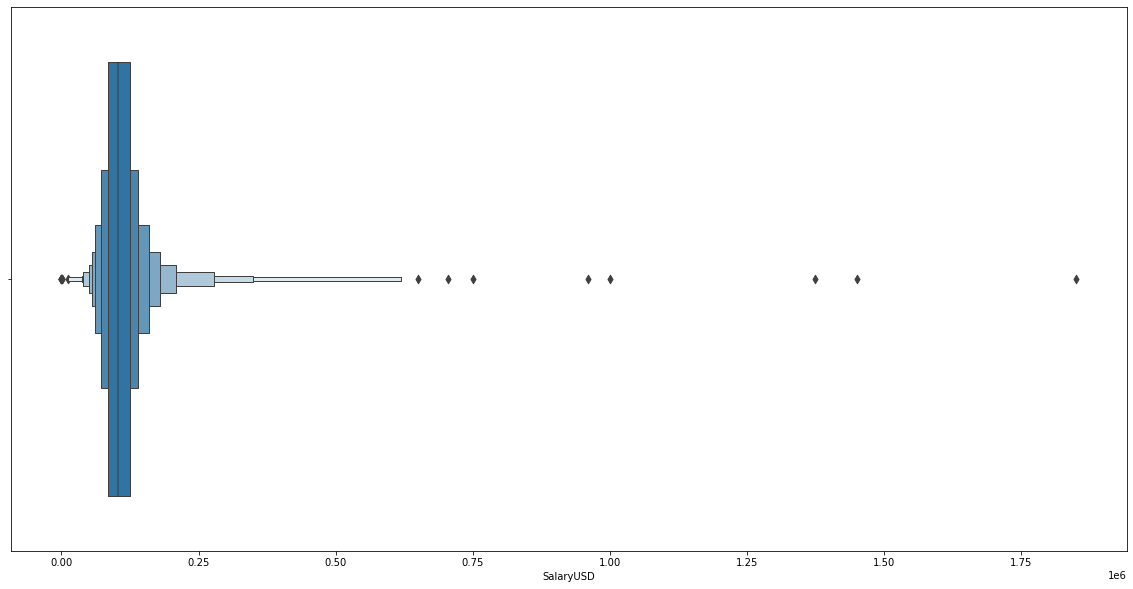

In [22]:
plt.figure(figsize = (20,10))
sns.boxenplot(x = data2["SalaryUSD"], k_depth="tukey")

In [23]:
data2 = data2.drop(data2[data2["SalaryUSD"] < 25000].index)
data2 = data2.drop(data2[data2["SalaryUSD"] > 360000].index)

Supprission des valeurs extremes 

<AxesSubplot:xlabel='SalaryUSD'>

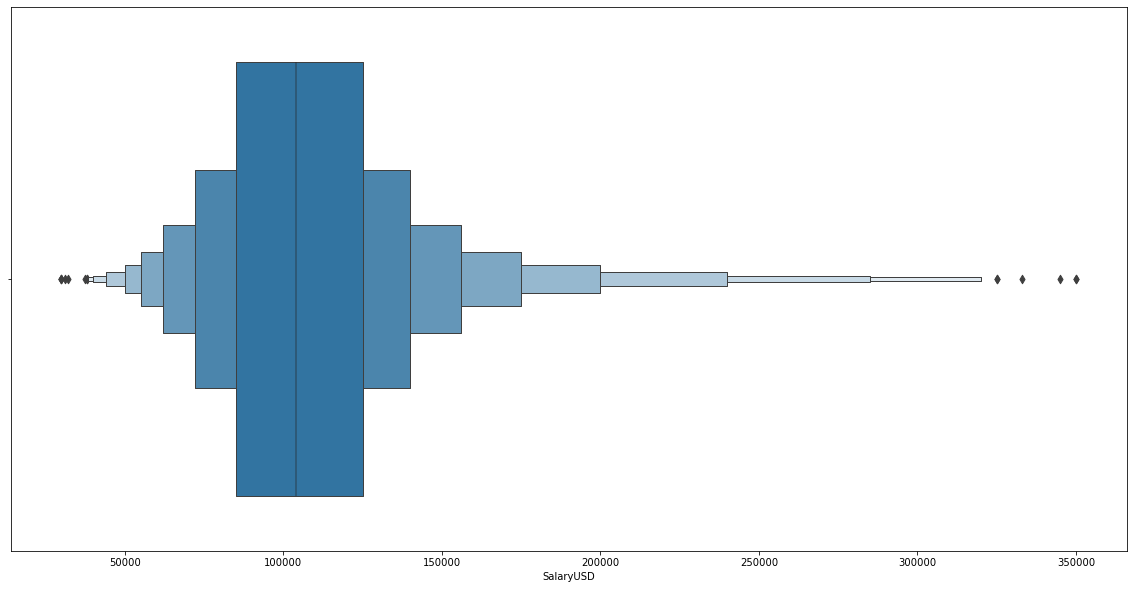

In [24]:
plt.figure(figsize = (20,10))
sns.boxenplot(x = data2["SalaryUSD"], k_depth="tukey")

In [25]:
save_to_mysql(db_connect=connect,df_to_save=data,df_name='Analyst_01_v1.0')
save_to_mysql(db_connect=connect,df_to_save=data2,df_name='Salary_01_v1.0')

Je sauvegarde mon travail